In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from folium import Choropleth
# import geopandas as gpd


In [24]:
import pickle

absolute_path = r"C:\Users\mehme\becode---\BECODE___PROJECTS\01.IMMOELIZA\02.Data_Analysis\df.pkl"

with open(absolute_path, "rb") as f:
    df = pickle.load(f)

df.head(5)    

,bathroomcount,bedroomcount,constructionyear,fireplace,furnished,garden,kitchen,livingarea,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty
0,1,1,1969,0,0,0,1,29.0,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,4,apartment,203,0,1,1,2
1,6,13,1920,0,0,0,2,391.0,3,D,7500,765000,10956841,Hainaut,Wallonie,31,1,4,apartment,130,0,0,5,1
2,2,4,2008,0,1,0,1,111.0,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,4,house,0,0,0,2,1
3,1,4,1979,0,0,1,1,113.6,2,F,8660,230000,10956664,West Flanders,Flanders,9,1,2,house,170,0,1,2,1
4,0,2,1972,0,0,0,1,92.0,2,B,3500,198000,10956668,Limburg,Flanders,1,0,5,apartment,400,0,1,1,2


In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df.shape

(116747, 24)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116747 entries, 0 to 118713
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bathroomcount      116747 non-null  int32  
 1   bedroomcount       116747 non-null  int64  
 2   constructionyear   116747 non-null  int32  
 3   fireplace          116747 non-null  int32  
 4   furnished          116747 non-null  int32  
 5   garden             116747 non-null  int32  
 6   kitchen            116747 non-null  int64  
 7   livingarea         116747 non-null  float64
 8   numberoffacades    116747 non-null  int32  
 9   peb                116747 non-null  object 
 10  postalcode         116747 non-null  int64  
 11  price              116747 non-null  int64  
 12  propertyid         116747 non-null  int64  
 13  province           116747 non-null  object 
 14  region             116747 non-null  object 
 15  roomcount          116747 non-null  int32  
 16  showerc

# **CHARTS**

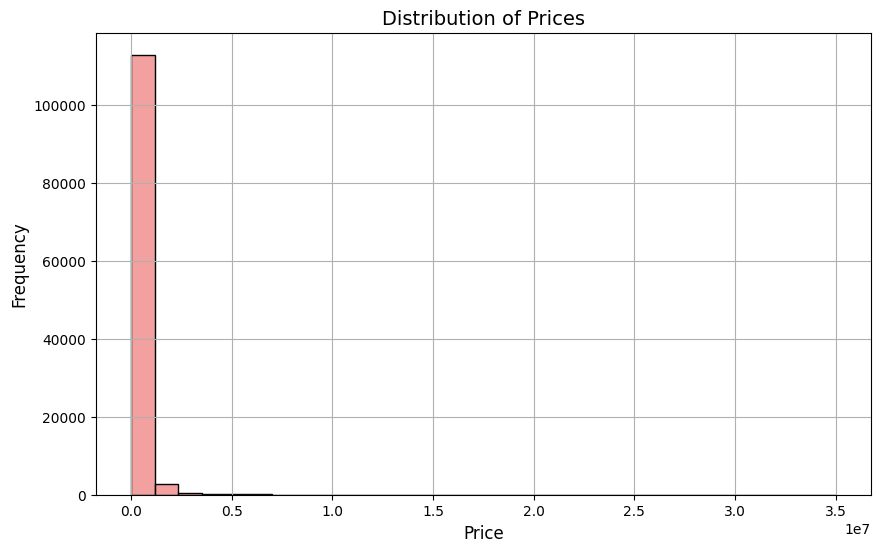

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df.price, bins=30, color='lightcoral', kde=False)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prices', fontsize=14)
plt.grid(True)  
plt.show()

In [29]:
df.dtypes

bathroomcount          int32
bedroomcount           int64
constructionyear       int32
fireplace              int32
furnished              int32
garden                 int32
kitchen                int64
livingarea           float64
numberoffacades        int32
peb                   object
postalcode             int64
price                  int64
propertyid             int64
province              object
region                object
roomcount              int32
showercount            int32
stateofbuilding        int64
subtypeofproperty     object
surfaceofplot          int32
swimmingpool           int32
terrace                int32
toiletcount            int32
typeofproperty         int64
dtype: object

# **Numeric Feature**

Text(0.5, 1.0, 'Numeric Feature Heatmap')

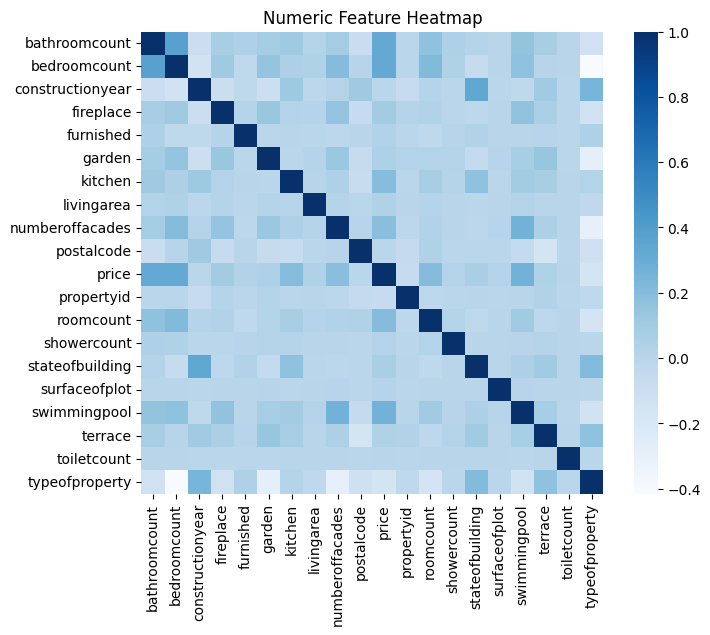

In [30]:
fig, ax = plt.subplots(figsize = (8, 6))
correlation = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()
sns.heatmap(correlation, ax = ax, vmax = 1, square = True, cmap='Blues')
plt.title('Numeric Feature Heatmap')

### **Delete Outliers in Living Area and Bedrooom Count**

In [31]:
display(df.shape)
Q1 = df['livingarea'].quantile(0.1)
Q3 = df['livingarea'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(lower_bound, upper_bound)
df = df[(df['livingarea'] > lower_bound) & (df['livingarea'] < upper_bound)]
# display(df.shape)


(116747, 24)

In [32]:
display(df.shape)
Q1 = df['bedroomcount'].quantile(0.1)
Q3 = df['bedroomcount'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
df = df[(df['bedroomcount'] > lower_bound) & (df['bedroomcount'] < upper_bound)]
# display(df.shape)


(114911, 24)

-3.5 8.5


# **Correlation**

In [33]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()


correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


,price
price,1.000000
livingarea,0.410409
bedroomcount,0.299225
bathroomcount,0.253420
swimmingpool,0.247154
roomcount,0.206833
kitchen,0.200360
numberoffacades,0.182654
fireplace,0.084442
stateofbuilding,0.066176


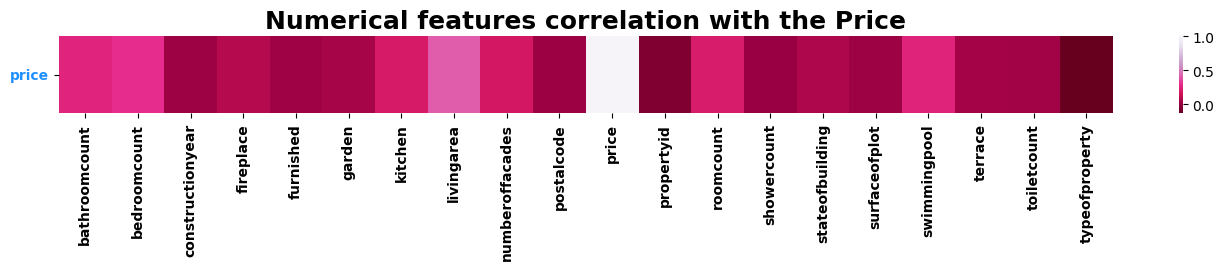

In [34]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))


sns.heatmap(corr_num.sort_values(by = ['price'], ascending = False).head(1), cmap = 'PuRd_r');
plt.title("Numerical features correlation with the Price", weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)

plt.show()

# **LIVING AREA Distribution**


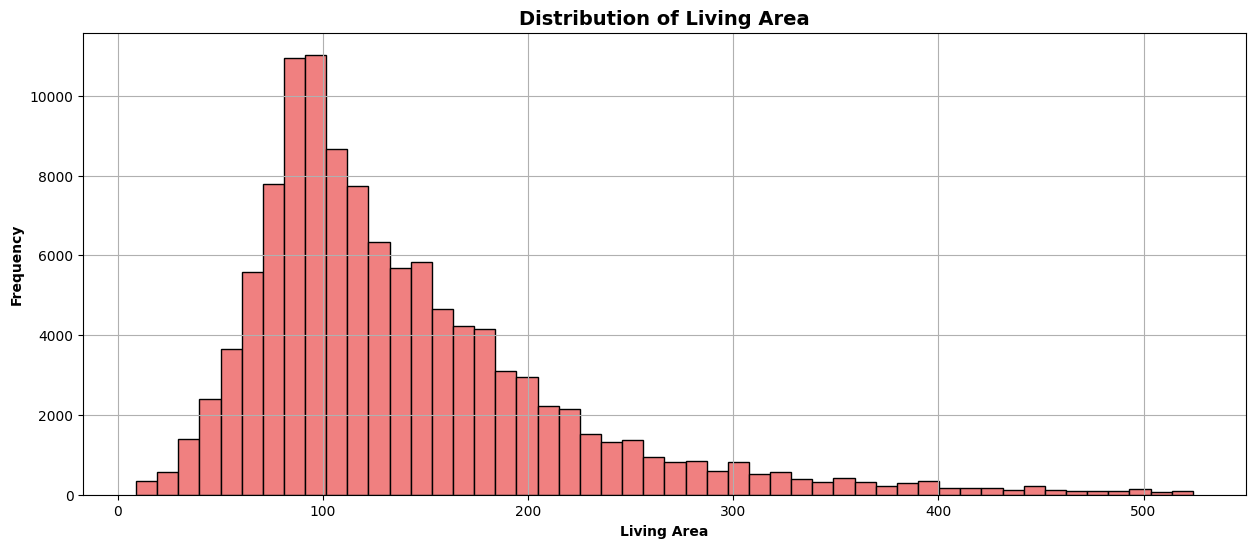

In [35]:
plt.figure(figsize=(15, 6))
plt.hist(df['livingarea'], bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribution of Living Area", weight='bold', fontsize=14)
plt.xlabel("Living Area", weight='bold')
plt.ylabel("Frequency", weight='bold')
plt.grid(True)
plt.show()

# **PROVINCES vs AVG PRICES** 

In [36]:
avg_price_province = df.groupby('province')['price'].mean().reset_index()
avg_price_province.head()

,province,price
0,Antwerp,376869.017188
1,Brussels,360083.376272
2,East Flanders,345184.197572
3,Flemish Brabant,399907.249894
4,Hainaut,226465.583074


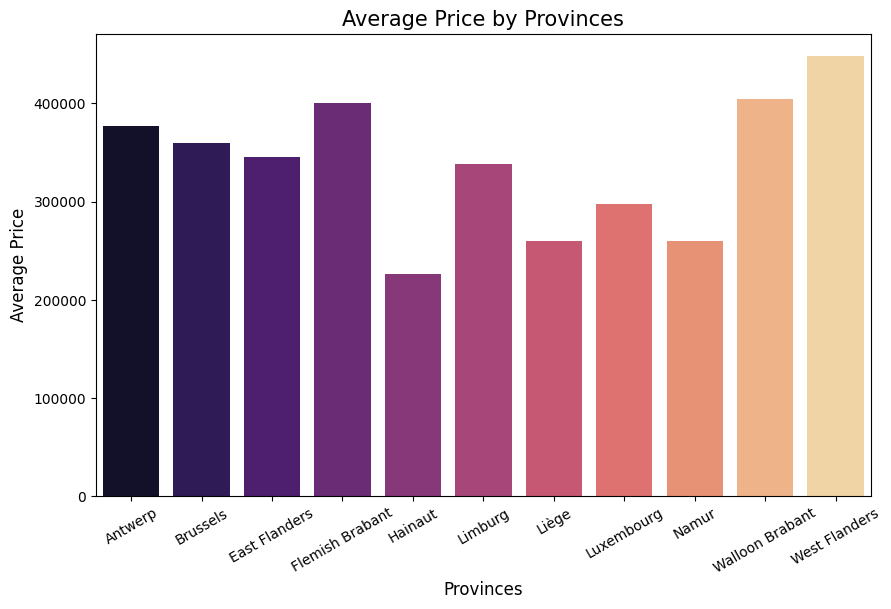

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data = avg_price_province, y ="price", x ="province", hue = 'province', palette='magma')
plt.xticks(rotation=30)
plt.xlabel('Provinces',  fontsize = 12)
plt.ylabel('Average Price',  fontsize = 12)
plt.title('Average Price by Provinces',  fontsize = 15)
plt.show()

# **DECADES vs AVG PRICES** 

In [38]:
def year_to_decade(year):
    return (year // 10) * 10

df['decade'] = df['constructionyear'].apply(year_to_decade)

In [39]:
decades = df.groupby('decade')['price'].mean().reset_index()

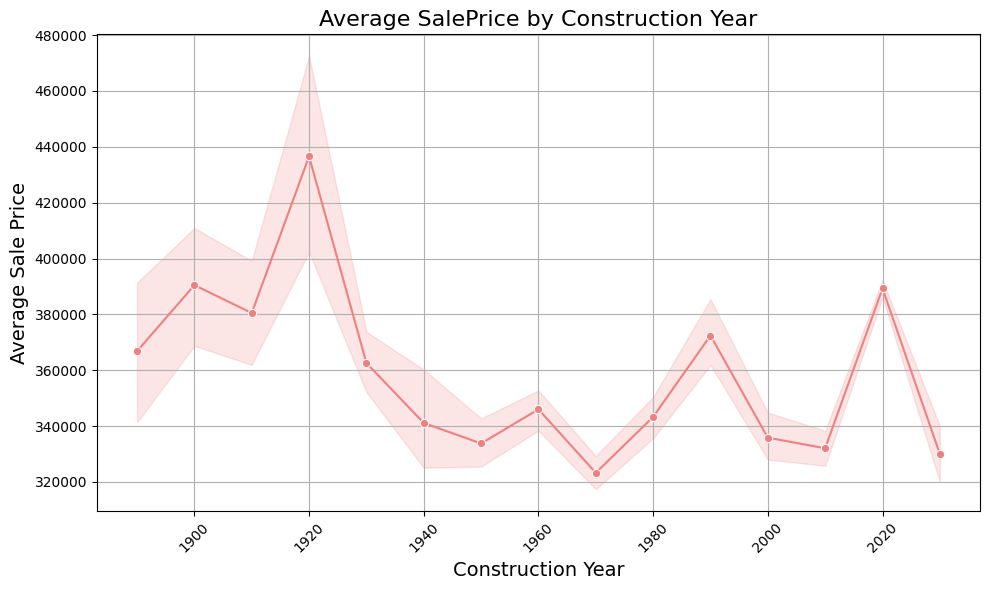

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='decade', y='price', marker='o', color='lightcoral')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

# **Bedroom Count VS Price**

In [41]:
bedr_mean = df.groupby('bedroomcount')['price'].mean().reset_index()


<Axes: xlabel='bedroomcount', ylabel='price'>

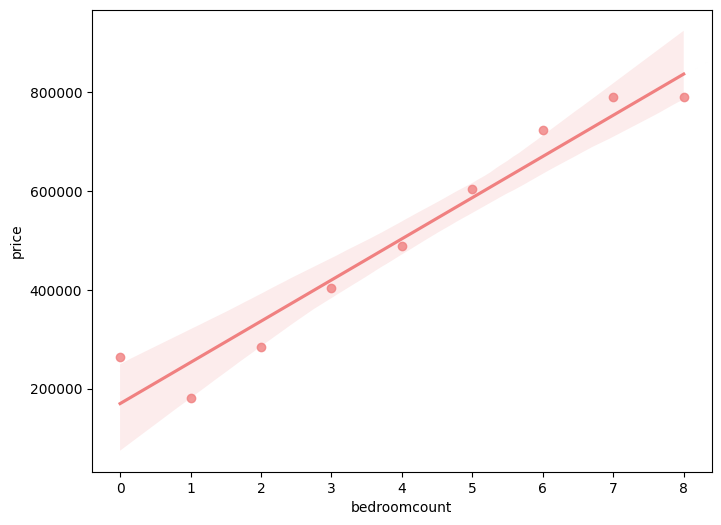

In [42]:


fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'bedroomcount', y='price' , data=bedr_mean, ax=ax, color = 'lightcoral')

## **price per square meter**

In [43]:

# df['per_square'] = df['price'] / df['livingarea']

In [44]:
# dist_per_meter = df.groupby('district')['per_square'].mean().reset_index()
# dist_per_meter.head()

In [45]:
# province_per_meter = df.groupby('province')['per_square'].mean().reset_index()
# province_per_meter.head()

In [46]:
# region_per_meter = df.groupby('region')['per_square'].mean().reset_index()
# region_per_meter.head()

In [47]:
# fig, ax = plt.subplots(3, 1, figsize = (10, 9))
# plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

# ax[0].scatter(dist_per_meter['district'], dist_per_meter['per_square'], color = 'lightcoral', s = 100)
# ax[0].plot(dist_per_meter['district'], dist_per_meter['per_square'], linestyle='--', color='darkred')
# ax[0].set_title('Districts vs Price per Square Meter')
# ax[0].set_xticks(np.arange(len(dist_per_meter['district']))) 
# ax[0].set_xticklabels(dist_per_meter['district'], rotation = 70, fontsize = 10)

# ax[1].scatter(province_per_meter['province'], province_per_meter['per_square'], color = 'lightcoral', s = 100)
# ax[1].plot(province_per_meter['province'], province_per_meter['per_square'], linestyle='--', color='darkred')
# ax[1].set_title('Provinces vs Price per Square Meter')
# ax[1].set_xticks(np.arange(len(province_per_meter['province']))) 
# ax[1].set_xticklabels(province_per_meter['province'], rotation = 70, fontsize = 10)


# ax[2].scatter(region_per_meter['region'], region_per_meter['per_square'], color = 'lightcoral', s = 100)
# ax[2].plot(region_per_meter['region'], region_per_meter['per_square'], linestyle='--', color='darkred')
# ax[2].set_title('Regions vs Price per Square Meter')
# ax[2].set_xticks(np.arange(len(region_per_meter['region'])))
# ax[2].set_xticklabels(region_per_meter['region'], rotation = 70, fontsize = 10)


# plt.tight_layout()



In [48]:
# plt.figure(figsize=(10, 6))
# sns.regplot(x='livingarea', y='price', data=liv_area, scatter_kws={'s': 20}, line_kws={'color': 'red'})
# plt.title('Relationship between Living Area and Price', fontsize=16)
# plt.xlabel('Living Area', fontsize=14)
# plt.ylabel('Price', fontsize=14)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [49]:
state = df.groupby('stateofbuilding')['price'].mean().reset_index()
state.head()

,stateofbuilding,price
0,0,255168.221675
1,1,309500.093030
2,2,303710.087168
3,3,323564.418480
4,4,360639.708492


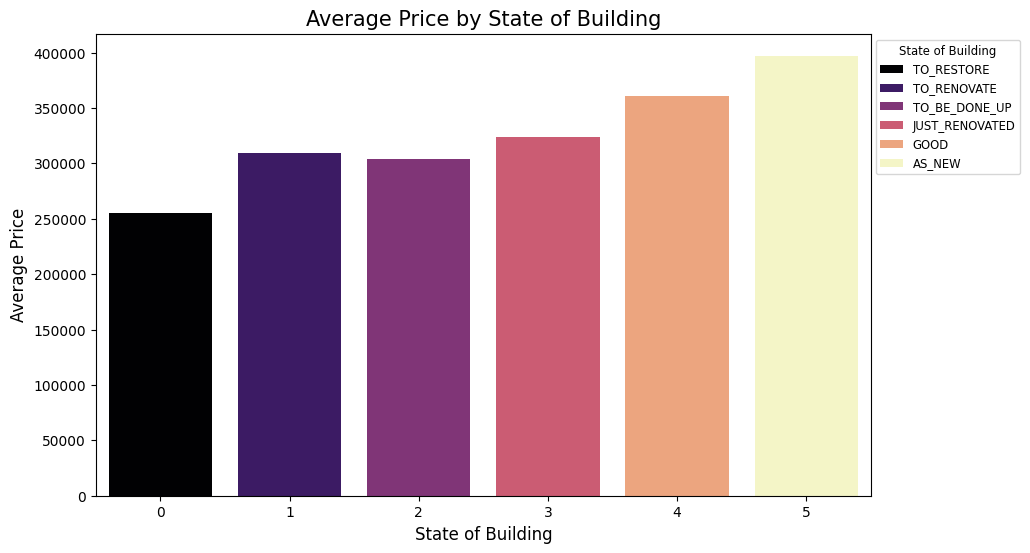

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data = state, y="price", x="stateofbuilding",hue = 'stateofbuilding', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
# plt.xticks(rotation=30)
plt.xlabel('State of Building',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Average Price by State of Building',  fontsize = 15)


legend_labels = ['TO_RESTORE', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'JUST_RENOVATED', 'GOOD', 'AS_NEW']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='State of Building', fontsize='small', title_fontsize='small')



plt.show()

In [51]:
df.region.value_counts()

region
Flanders    67877
Wallonie    33203
Brussels    13461
Name: count, dtype: int64

Text(0.5, 1.0, 'Region vs Price')

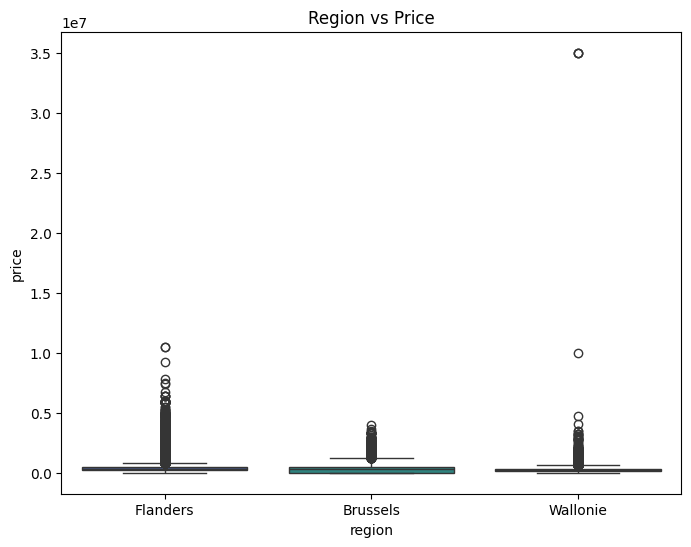

In [52]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',hue = 'region', data = df, ax=ax, palette='viridis')
plt.title('Region vs Price')

In [53]:
df.typeofproperty.value_counts()

typeofproperty
2    59970
1    54571
Name: count, dtype: int64

In [54]:
type_home = df.groupby('typeofproperty')['price'].mean().reset_index()
display(type_home)
property_mapping = { 1: 'HOUSE', 2: 'APARTMENT'}
type_home['typeofproperty'] = type_home['typeofproperty'].map(property_mapping)
display(type_home)                                        

,typeofproperty,price
0,1,413779.421268
1,2,307051.223445


,typeofproperty,price
0,HOUSE,413779.421268
1,APARTMENT,307051.223445


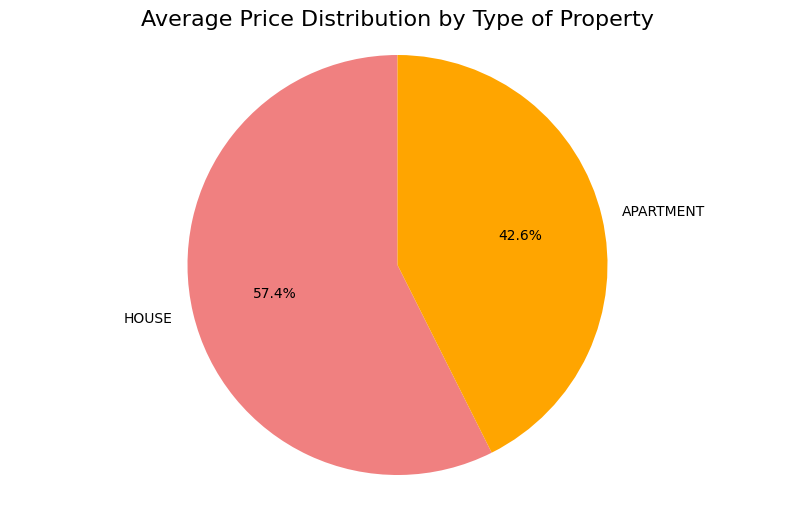

In [55]:
plt.figure(figsize = (10, 6))
plt.pie(type_home['price'], labels = type_home['typeofproperty'], autopct = '%1.1f%%', startangle = 90, colors = ['lightcoral', 'orange', ]);
plt.title('Average Price Distribution by Type of Property', fontsize=16)
plt.axis('equal')
plt.show()

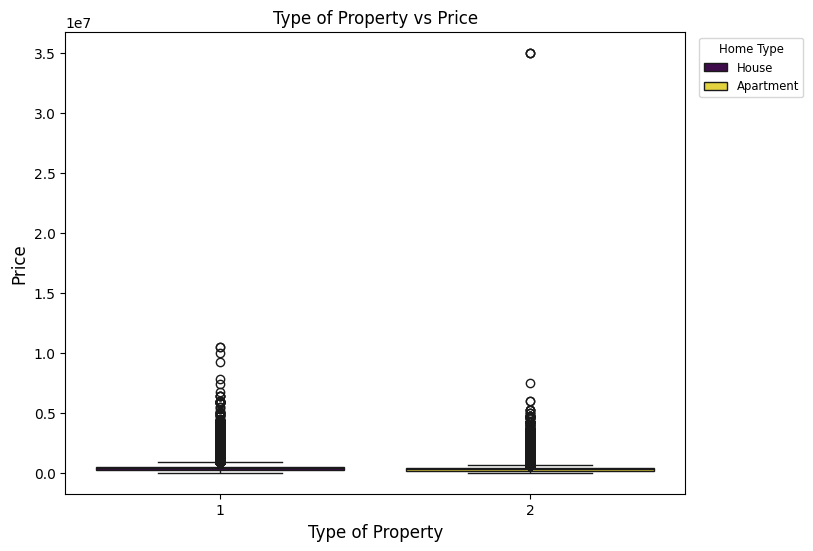

In [56]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'typeofproperty', y = 'price',hue = 'typeofproperty', data = df, ax=ax, palette='viridis')
plt.title('Type of Property vs Price')
plt.xlabel('Type of Property',  fontsize = 12)
plt.ylabel('Price',  fontsize = 12)

legend_labels = ['House','Apartment']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='Home Type', fontsize='small', title_fontsize='small')

plt.show()

In [57]:
kitchen_stats = df.groupby('kitchen')['price'].mean().reset_index()
kitchen_stats.head()

,kitchen,price
0,0,287417.903408
1,1,297133.756465
2,2,350921.414738
3,3,508169.787351


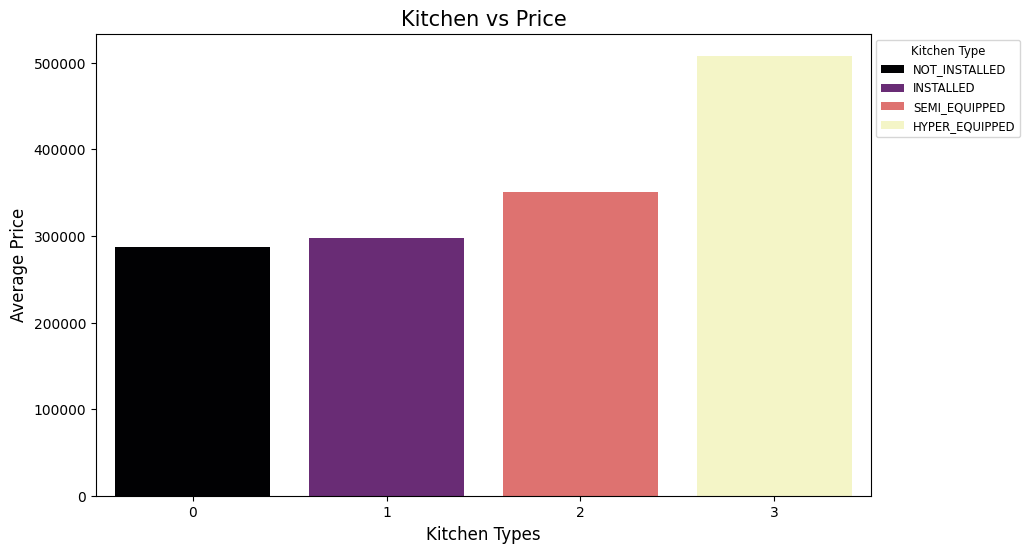

In [58]:


plt.figure(figsize=(10, 6))
sns.barplot(data = kitchen_stats, y="price", x="kitchen",hue = 'kitchen', palette='magma');
plt.xlabel('Kitchen Types',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Kitchen vs Price',  fontsize = 15)



legend_labels = ['NOT_INSTALLED','INSTALLED','SEMI_EQUIPPED','HYPER_EQUIPPED']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='Kitchen Type', fontsize='small', title_fontsize='small')


plt.show()

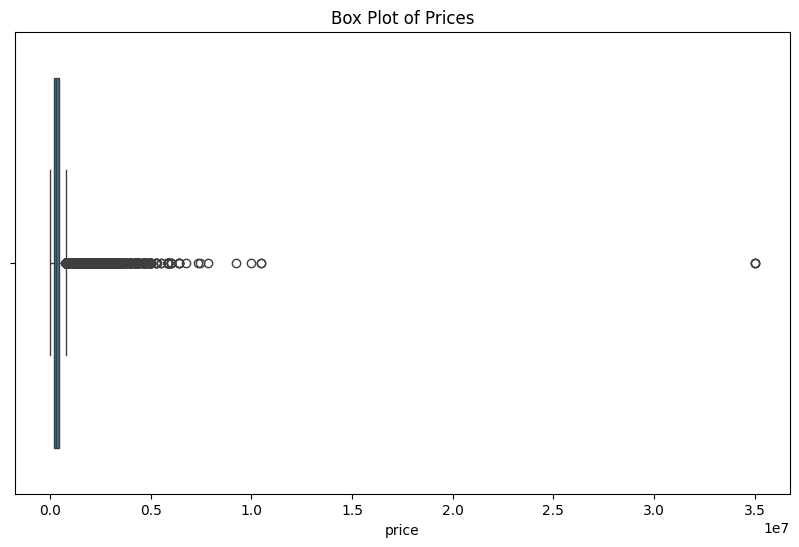

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

In [60]:

correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation

,price
price,1.000000
livingarea,0.410409
bedroomcount,0.299225
bathroomcount,0.253420
swimmingpool,0.247154
roomcount,0.206833
kitchen,0.200360
numberoffacades,0.182654
fireplace,0.084442
stateofbuilding,0.066176


In [61]:
bedroom = df.groupby('bedroomcount')['price'].mean().reset_index()

bedroom.head()

,bedroomcount,price
0,0,264583.729353
1,1,181885.706499
2,2,284091.857989
3,3,404202.826346
4,4,488690.896317


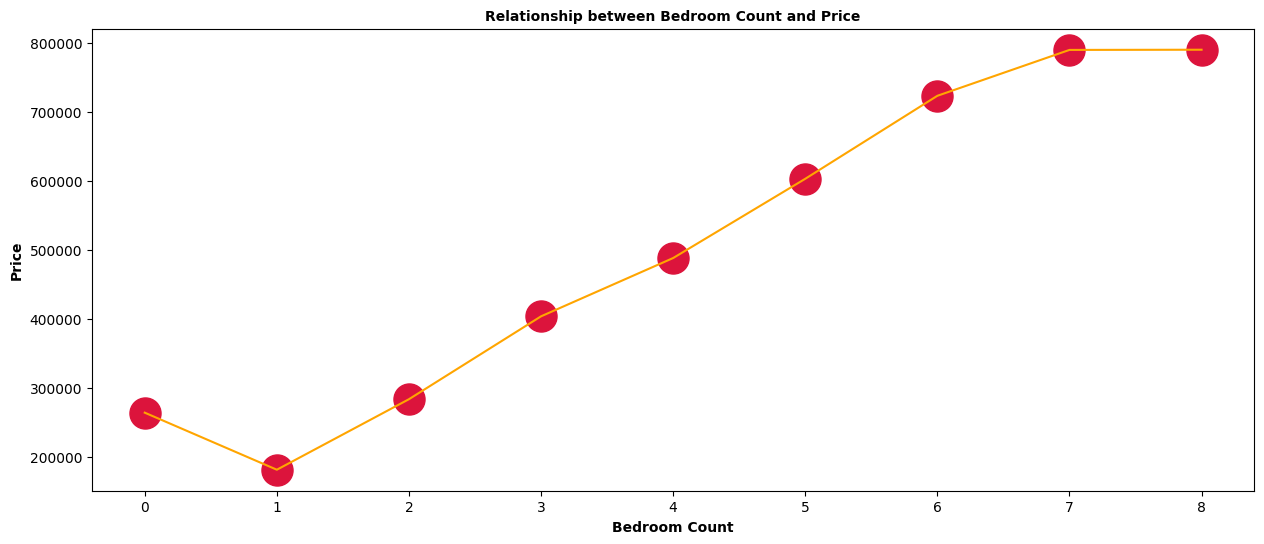

In [62]:
plt.figure(figsize=(15, 6))
plt.scatter(data=bedroom, x='bedroomcount', y='price', color='crimson', alpha=1, s=500)
plt.plot(bedroom['bedroomcount'], bedroom['price'], color = 'orange')  
plt.title("Relationship between Bedroom Count and Price", weight='bold', fontsize=10)
plt.xlabel("Bedroom Count", weight='bold')
plt.ylabel("Price", weight='bold')
plt.show()

In [63]:
# # upload the house data


# # calculate the number of houses per postal code
# post_code_counts = df['postalcode'].value_counts()
# house_count = df['propertyid'].value_counts()

# # convert the series to a DataFrame
# summary_df = post_code_counts.reset_index()
# summary_df.columns = ['Postal Code', 'House Count']

# # save the summary to a csv file
# summary_df.to_csv('post_code_summary.csv', index=False)
# # load geojson 
# gdf = gpd.read_file('georef-belgium-postal-codes.geojson')

# # load summary data
# summary_df = pd.read_csv('post_code_summary.csv')

# # arrange data types
# gdf['postcode'] = gdf['postcode'].astype(str)
# summary_df['Postal Code'] = summary_df['Postal Code'].astype(str)

# # merge data
# gdf = gdf.merge(summary_df, left_on='postcode', right_on='Postal Code', how='left')

# # empty house counts are filled with 0
# gdf['House Count'].fillna(0, inplace=True)
# gdf['House Count'] = gdf['House Count'].astype(int)

# # create a folium map
# map = folium.Map(location=[50.85, 4.35], zoom_start=7)  # Belgium coordinates

# # create a folium choropleth map
# folium.Choropleth(
#     geo_data=gdf,
#     data=gdf,
#     columns=['postcode', 'House Count'],
#     key_on='feature.properties.postcode',  # GeoJSON property path to the postcode
#     fill_color='YlOrBr',  # color scale
#     fill_opacity=0.7,
#     line_opacity=0.3,
#     legend_name='House Count'
# ).add_to(map)

# # save the map
# map.save('map_chart.html')




In [64]:
df.head()

,bathroomcount,bedroomcount,constructionyear,fireplace,furnished,garden,kitchen,livingarea,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,decade
0,1,1,1969,0,0,0,1,29.0,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,4,apartment,203,0,1,1,2,1960
2,2,4,2008,0,1,0,1,111.0,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,4,house,0,0,0,2,1,2000
3,1,4,1979,0,0,1,1,113.6,2,F,8660,230000,10956664,West Flanders,Flanders,9,1,2,house,170,0,1,2,1,1970
4,0,2,1972,0,0,0,1,92.0,2,B,3500,198000,10956668,Limburg,Flanders,1,0,5,apartment,400,0,1,1,2,1970
5,1,1,1994,0,1,0,3,50.0,2,E,1030,215000,10956614,Brussels,Brussels,3,1,5,apartment,143,0,1,1,2,1990


In [65]:
print(len(df[df['district'] == 'Brugge']))

KeyError: 'district'

In [66]:
df[['district', 'price']].head()

KeyError: "['district'] not in index"

In [67]:
df.groupby('region')['bedroomcount'].mean().reset_index()

,region,bedroomcount
0,Brussels,2.320556
1,Flanders,2.608100
2,Wallonie,2.705087


In [68]:
with open("after_vis_df.pkl", "wb") as f:
    pickle.dump(df, f)